# 1. Quick Preview of the Data Set

In [1]:
import pandas as pd

dataframe = pd.read_csv("aps_failure_set.csv")

In [2]:
dataframe.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
dataframe.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


# 2. Characterisation of the Data Set

In [5]:
import pandas as pd

dataframe = pd.read_csv("aps_failure_set.csv", na_values="na")

## 2.1 Size, number of attributes, number of observations

In [6]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 60000
Number of Columns (Attributes): 171


- Dataset is defined by means of a number of rows representing observations that determine the size of the dataset being analyzed. It gives us an idea of the number of instances that describe each variable in our data set.

- By knowing how many columns a data set has, one easily understands its dimensionality. Every column refers to a variable, attribute or a feature. Therefore, the number of attributes tells us the amount of details available in the data.

## 2.2 Check for missing values

In [7]:
missing_values = dataframe.isna().sum()
attributes_with_missing_values = missing_values[missing_values > 0]

print("Number of Attributes with Missing Values:", attributes_with_missing_values.count())

Number of Attributes with Missing Values: 169


## 2.3 Percentage of Missing Values for Each Attribute

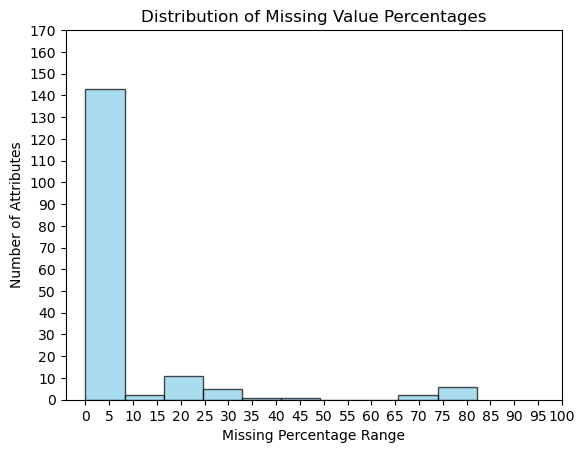

In [8]:
import matplotlib.pyplot as plt

missing_percentage = dataframe.isna().mean() * 100

x_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]

plt.hist(missing_percentage, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Missing Value Percentages")
plt.xlabel("Missing Percentage Range")
plt.ylabel("Number of Attributes")
plt.xticks(x_bins)
plt.yticks(y_bins)
plt.show()

- Missing values in data can be easily identified if the attributes are listed. Analysis and modeling may be compromised by missing data, and therefore it affects the validity.

- We determine the degree of missing data by considering the number of attributes that lack values as well as the missing frequency for each attribute. Missing data in attributes that involve many missing values is handled via filling them using some sort of imputation or removal technique.

- It is important to tackle the issue of missing values as it directly affects decision-making concerning optimal data pretreatment.

# 3. Data Preparation and EDA Visualizations

In [9]:
features_with_na_and_zeros = dataframe.drop(columns="class")
categorical_target = dataframe["class"]

In [10]:
features_with_na_and_zeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(169), int64(1)
memory usage: 77.8 MB


- We have numerical values for all columns on features

In [11]:
print("Unique values for target:", categorical_target.unique())

Unique values for target: ['neg' 'pos']


## 3.1 Impute Missing Values

In [12]:
import numpy as np

features_with_na = features_with_na_and_zeros.replace(0, np.nan)
features = features_with_na.fillna(features_with_na.mean())

In [13]:
numerical_dummy_target = pd.get_dummies(categorical_target)

In [14]:
numerical_target = numerical_dummy_target.drop("neg", axis=1)
target = numerical_target

## 3.2 PCA to Establish Minimum Number of Features

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(features)

PCA()

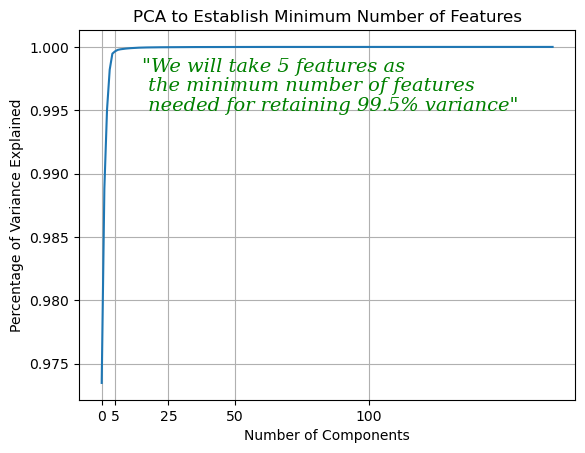

In [23]:
import matplotlib.pyplot as plt
import numpy as np

font = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 14}

text_line_1 = '"We will take 5 features as'
text_line_2 = ' the minimum number of features'
text_line_3 = ' needed for retaining 99.5% variance"'

text_line_x_position = 15

text_line_1_y_position = 0.998
text_line_2_y_position = 0.9965
text_line_3_y_position = 0.995

x_bins = [0, 5, 25, 50, 100]
y_bins = [0.975, 0.980, 0.985, 0.990, .995, 1.0]

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('PCA to Establish Minimum Number of Features')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained');
plt.xticks(x_bins)
plt.yticks(y_bins)
plt.text(text_line_x_position, text_line_1_y_position, text_line_1, style='italic', fontdict=font)
plt.text(text_line_x_position, text_line_2_y_position, text_line_2, style='italic', fontdict=font)
plt.text(text_line_x_position, text_line_3_y_position, text_line_3, style='italic', fontdict=font)
plt.grid(True)

## 3.3 Implement PCA to Dimensionally Reduce the Data to the Number of Features 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(5)
features_pca = pca.fit_transform(features_scaled)

In [26]:
reduced_features = pd.DataFrame(features_pca, columns =['C1', 'C2', 'C3', 'C4', 'C5'])
reduced_features.head()

,C1,C2,C3,C4,C5
0,2.414146,-0.850519,-1.779816,0.607250,0.006393
1,-0.656664,-0.143995,-0.180485,0.212129,-0.106091
2,-1.295238,0.212567,-0.212034,-0.669020,0.413087
3,-3.307475,-0.689015,0.178218,-0.527752,0.468758
4,0.107299,0.130660,-0.682761,-0.103748,-0.337018


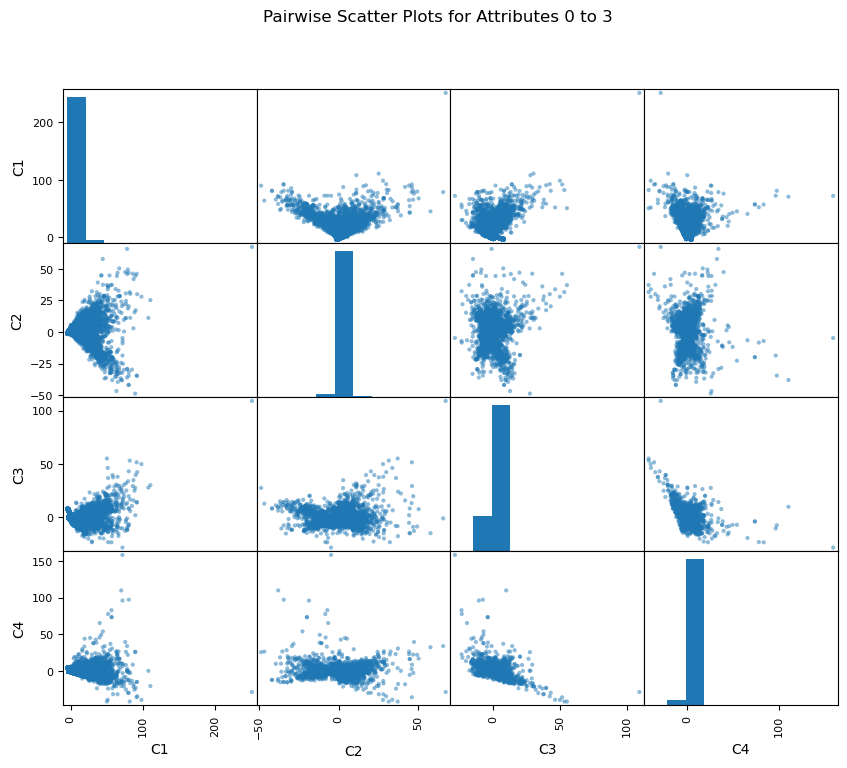

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(reduced_features.iloc[:, 0:4], alpha=0.5, figsize=(10, 8))
plt.suptitle("Pairwise Scatter Plots for Attributes 0 to 3")
plt.show()

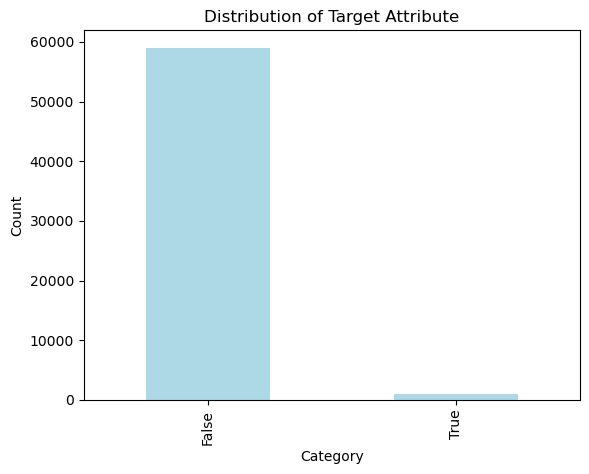

In [29]:
import matplotlib.pyplot as plt

target["pos"].value_counts().plot(kind="bar", color="lightblue")
plt.title("Distribution of Target Attribute")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# 4. Machine Learning

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
from sklearn.model_selection import train_test_split

X = reduced_features
Y = target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [35]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [36]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983917 (0.000945)
LDA: 0.980167 (0.001923)
KNN: 0.987958 (0.000935)
CART: 0.984396 (0.001303)
NB: 0.974646 (0.001866)
SVM: 0.985062 (0.000611)


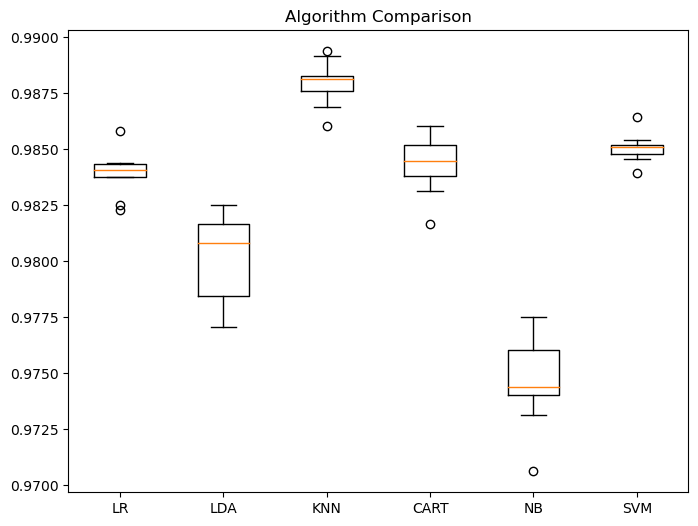

In [38]:
plt.figure(figsize=(8, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# 5. Curve of Dimensionality 

The problems experienced when many attributes and features are incorporated into our data is commonly referred to as the Curse of Dimensionality. We had 170 features which translates to many attributes and this posed some challenges due that.

Secondly, the project grew in terms of its computational requirements. For instance, the attribute is an extensive data set and hence our analysis took much time as our computers needed to perform more computations thus slowing us down.

Further, interpreting our information became more challenging. It was difficult to see connections or relations among such a number of features. These interactions could not be shown through traditional plots and graphs.

Furthermore, as data became bigger, it also raised a risk of introducing irrelevant information that may bias our model.

In order to deal with these problems we downsized the dataset made up of 170 features into 5 using PCA method to decrease attribute count while preserving key data, rendering our project less complicated and intelligible.